In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1969.1177896012598


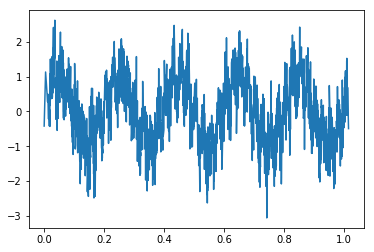

In [2]:
N = 2001
t = np.linspace(0, 1.0, N) + np.random.normal(0, 0.005, N)
t = np.sort(t - min(t))
fs = N / (max(t) - min(t))
print(fs)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 40 * t)
x = xlow + 0.5 * xhigh + np.random.normal(0, 0.5, N)
plt.plot(t, x)

In [3]:
high = 300
low = 4
cutoff = 40
bb, ab = signal.butter(3, cutoff*2./fs, btype='lowpass')
print(bb, ab)
normalization = np.sqrt((high-low)/(fs/2))
normalization=1
x_filtered = signal.filtfilt(bb, ab, x) / normalization

[0.00022968 0.00068903 0.00068903 0.00022968] [ 1.         -2.74490191  2.52131258 -0.77457326]


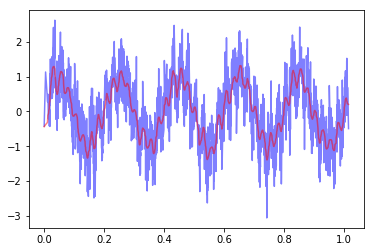

In [4]:
plt.plot(t, x, 'b', alpha=0.5)
plt.plot(t, x_filtered, 'r', alpha=0.5)

In [70]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [148]:
reg = ElasticNet(alpha=0.01, l1_ratio=0.5)
reg2 = ElasticNet(alpha=0.01, l1_ratio=0.5)
# reg = Lasso(alpha=0.001)
# reg = Ridge(alpha=0.001)

In [149]:
df = 1 / (max(t) - min(t))
k = (-(N//2) + np.arange(N)) * df
F = np.exp(2j * np.pi * t.reshape(-1, 1) * k)
F_splited = np.hstack((F.real, F.imag))

def cast_into_FT(coefs):
    n_freqs = int(len(coefs) / 2)
    ft = 1j * np.zeros(n_freqs)
    for i in range(n_freqs):
        ft[i] = coefs[i] + 1j * coefs[i + n_freqs]
    
    if len(ft) != n_freqs:
        raise ValueError("fail")
    return ft

reg.fit(F_splited, x)
coef = reg.coef_
ft = cast_into_FT(coef)
reg2.fit(F_splited, x_filtered)
coef2 = reg2.coef_
ft2 = cast_into_FT(coef2)

(0, 100)

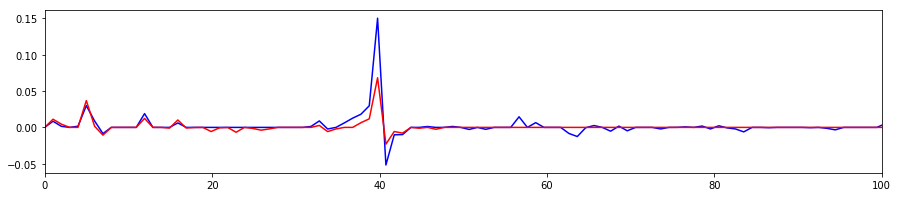

In [150]:
plt.figure(figsize=(15, 3))
plt.plot(k, ft.real, 'b')
plt.plot(k, ft2.real, 'r')
plt.xlim([0, 100])